<a href="https://colab.research.google.com/github/FrancisKurian/CS530/blob/main/Regularized_Regressions_(Lasso%2C_Ridge%2C_Elastic_Net%2C_OLS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regularization through some Monte Carlo simulation.  
*First generate NxK draws from the standard normal.

In [ ]:
import numpy as np
import pandas as pd
df = pd.DataFrame(np.random.standard_normal(size=(500, 6)), columns=['X1','X2','X3','X4','X5','X6'])
error= pd.DataFrame(np.random.normal(1, 1.5, 500), columns=['e'])
df["Y"] =  0.6*df["X1"] + 0.28*df["X2"] -0.61*df["X3"] + 2.31*df["X4"] - 0.39*df["X5"]**2 - 0.1*df["X6"]**3 + error["e"]
df.head()

,X1,X2,X3,X4,X5,X6,Y
0,-0.787942,-0.618660,-1.025107,0.212985,1.672006,-0.011576,-1.300324
1,-1.249740,-1.489931,-0.133484,1.686950,-1.143447,1.264494,3.768604
2,1.629862,-1.566897,1.288227,1.247106,0.357432,1.457568,2.597704
3,0.865522,1.016895,-0.621021,0.296182,-0.791582,-0.175635,4.872079
4,0.810336,-1.190569,2.761529,2.102796,-0.356901,1.829562,3.005179


In [ ]:
cols= ["Y"]
X=df.drop(columns=cols)
y=df["Y"]

# OLS Regression on full dataset to see the general fit and coefficients list

In [ ]:
import statsmodels.api as sm
ols_model=sm.OLS(y,X).fit()
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.713
Model:                            OLS   Adj. R-squared (uncentered):              0.710
Method:                 Least Squares   F-statistic:                              204.7
Date:                Mon, 28 Feb 2022   Prob (F-statistic):                   1.75e-130
Time:                        03:10:08   Log-Likelihood:                         -950.58
No. Observations:                 500   AIC:                                      1913.
Df Residuals:                     494   BIC:                                      1938.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# K-Fold Cross Validation

In [ ]:
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from re import split

In [ ]:
kf = KFold(n_splits = 5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

## Define a function to train the model on train data and return the results on test data

In [ ]:
def mscore(model, X_train, X_test, y_train, y_test):
  md=model.fit(X_train, y_train)
  y_pred=md.predict(X_test)
  return md.score(X_test,y_test),mean_squared_error(y_test, y_pred)

# Fit various models-OLS,Ridge, Lasso & Elastic Net
## Kfold Training/Test: R Square and MSE extraction for test data

In [ ]:
ols =[]
ridge=[]
lasso=[]
enet=[]
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    ols.append(mscore(linear_model.LinearRegression(),X_train, X_test, y_train, y_test) )
    ridge.append(mscore(linear_model.Ridge(alpha=0.5),X_train, X_test, y_train, y_test))
    lasso.append(mscore(linear_model.Lasso(alpha =1),X_train, X_test, y_train, y_test))
    enet.append(mscore(linear_model.ElasticNet(alpha = 1),X_train, X_test, y_train, y_test))

    ols_df = pd.DataFrame(ols,columns=['R^2','MSE'])
    ridge_df = pd.DataFrame(ridge,columns=['R^2','MSE'])
    lasso_df = pd.DataFrame(lasso,columns=['R^2','MSE'])
    enet_df = pd.DataFrame(enet,columns=['R^2','MSE'])

#OLS: R^2 & MSE

In [ ]:
ols_df

,R^2,MSE
0,0.743229,2.911138
1,0.695013,2.432274
2,0.738053,2.116150
3,0.705100,2.522405
4,0.697636,2.473384


#Ridge R^2 & MSE

In [ ]:
ridge_df

,R^2,MSE
0,0.743078,2.912843
1,0.695178,2.430963
2,0.737929,2.117153
3,0.704987,2.523371
4,0.697944,2.470862


#Lasso R^2 & MSE

In [ ]:
lasso_df 

,R^2,MSE
0,0.492104,5.758253
1,0.516973,3.852148
2,0.483394,4.173432
3,0.436047,4.823736
4,0.549019,3.689088


# ENet R^2 & MSE

In [ ]:
enet_df 

,R^2,MSE
0,0.478187,5.916046
1,0.510496,3.903799
2,0.475616,4.236267
3,0.428922,4.884678
4,0.541940,3.746998


# Function to average R^2,MSE and plot bar charts

In [ ]:
def valc(lst1,lst2,stat):
  df = pd.DataFrame(columns = ['stat','model'])
  for i in range(0,len(lst1)):
    df.loc[i] =[lst1[i][stat].mean()] + [lst2[i]]
  return df

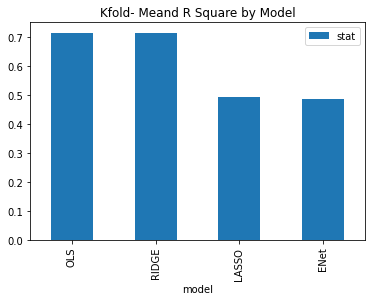

In [ ]:
import matplotlib.pyplot as plot
dflist= [ols_df,ridge_df,lasso_df,enet_df]
mlist= ['OLS','RIDGE','LASSO','ENet']
rsquare= valc(dflist,mlist,"R^2")
rsquare.plot.bar(x="model", y="stat", title="Kfold- Meand R Square by Model");
plot.show(block=True);

In [ ]:
rsquare

,stat,model
0,0.715806,OLS
1,0.715823,RIDGE
2,0.495507,LASSO
3,0.487032,ENet


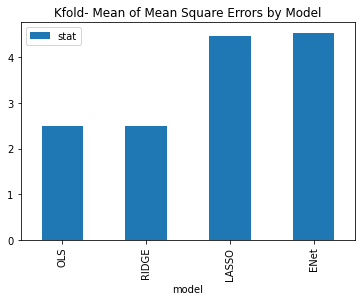

In [ ]:
mse= valc(dflist,mlist,"MSE")
mse.plot.bar(x="model", y="stat", title="Kfold- Mean of Mean Square Errors by Model");
plot.show(block=True);

In [ ]:
mse

,stat,model
0,2.491070,OLS
1,2.491038,RIDGE
2,4.459331,LASSO
3,4.537558,ENet


# Single Function to change K-Fold, Lambda

In [ ]:
def scenarios(splits,alpha):
  kf = KFold(n_splits = splits)
  print (kf)
  ols =[]
  ridge=[]
  lasso=[]
  enet=[]
  for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    ols.append(mscore(linear_model.LinearRegression(),X_train, X_test, y_train, y_test) )
    ridge.append(mscore(linear_model.Ridge(alpha=alpha),X_train, X_test, y_train, y_test))
    lasso.append(mscore(linear_model.Lasso(alpha =alpha),X_train, X_test, y_train, y_test))
    enet.append(mscore(linear_model.ElasticNet(alpha = alpha),X_train, X_test, y_train, y_test))

    ols_df = pd.DataFrame(ols,columns=['R^2','MSE'])
    ridge_df = pd.DataFrame(ridge,columns=['R^2','MSE'])
    lasso_df = pd.DataFrame(lasso,columns=['R^2','MSE'])
    enet_df = pd.DataFrame(enet,columns=['R^2','MSE'])

  dflist= [ols_df,ridge_df,lasso_df,enet_df]
  mlist= ['OLS','RIDGE','LASSO','ENet']
  rsquare= valc(dflist,mlist,"R^2")
  ax=rsquare.plot.bar(x="model", y="stat", title="Kfold- Mean R Square by Model")
  for p in ax.patches:
    ax.annotate(s=str(np.round(p.get_height(), decimals=2)),
                xy=(p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
    plot.ylabel('R Square')
  plot.show()

  mse= valc(dflist,mlist,"MSE")
  # mse.plot.bar(x="model", y="stat", title="Kfold- Mean of Mean Square Errors by Model")
  # plot.ylabel('Mean Square Error(MSE)')
  # plot.show(block=True);

  ax=mse.plot.bar(x="model", y="stat", title="Mean of Mean Square Errors by Model")
  for p in ax.patches:
    ax.annotate(s=str(np.round(p.get_height(), decimals=2)),
                xy=(p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')
    plot.ylabel('Mean Square Error(MSE)')
  plot.show()
  return rsquare, mse

#K-Fold: 2 Splits

KFold(n_splits=2, random_state=None, shuffle=False)


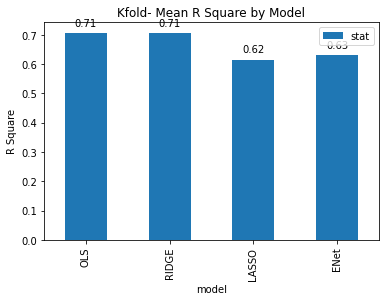

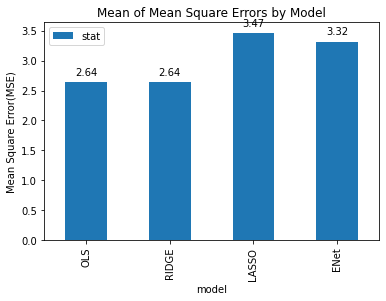

In [ ]:
df_rsquare, df_mse=scenarios(splits=2, alpha=0.5)

# K Fold- 10 Splits

KFold(n_splits=10, random_state=None, shuffle=False)


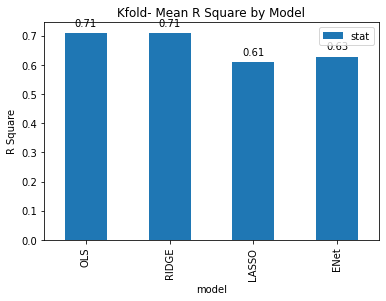

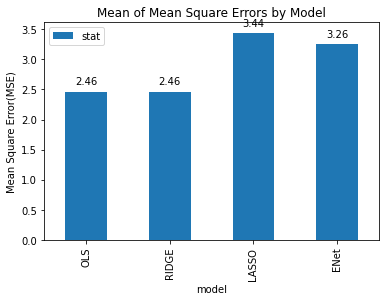

In [ ]:
df_rsquare, df_mse=scenarios(splits=10, alpha=0.5)

# Independent Variable with a Strong Correlation with another -X7=X1*0.6(Multicollinearity)
## Results displays  smallest eigenvalue warning that indicates multicollinearity 

In [ ]:
# extract a small sample
df3= df.copy().sample(n=20) 
df3 = df3.reset_index(drop=True)
df3['X7'] = df3['X1']*0.6
cols= ["Y"]
X=df3.drop(columns=cols)
y=df3["Y"]
ols_model=sm.OLS(y,X).fit()
print(ols_model.summary()) 

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.881
Method:                 Least Squares   F-statistic:                              25.60
Date:                Mon, 28 Feb 2022   Prob (F-statistic):                    8.77e-07
Time:                        03:11:48   Log-Likelihood:                         -31.995
No. Observations:                  20   AIC:                                      75.99
Df Residuals:                      14   BIC:                                      81.96
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

KFold(n_splits=2, random_state=None, shuffle=False)


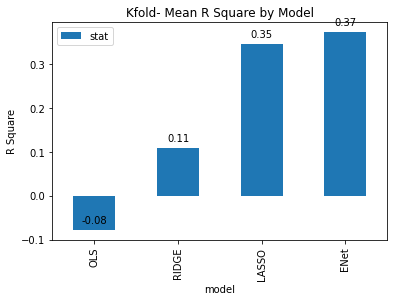

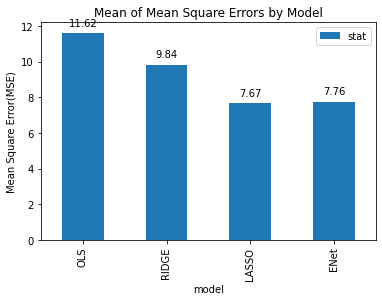

In [ ]:
df_rsquare, df_mse=scenarios(splits=2, alpha=0.5)

# Small Sample Regression(Regularization Effect on small sample)

In [ ]:
df3= df.copy().sample(n=30) #3*K
df3 = df3.reset_index(drop=True)
cols= ["Y"]
X=df3.drop(columns=cols)
y=df3["Y"]

KFold(n_splits=2, random_state=None, shuffle=False)


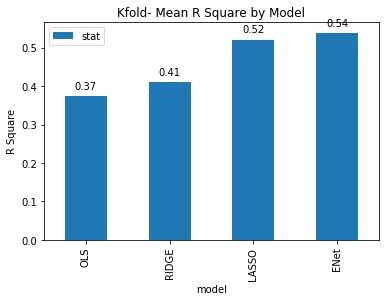

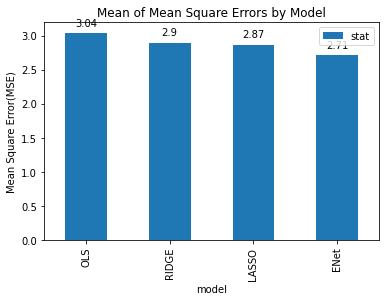

In [ ]:
df_rsquare, df_mse=scenarios(splits=2, alpha=0.2)

# Size of training set and MSE -Lasso

In [ ]:
from sklearn.model_selection import train_test_split
def size(sample_size,alpha):
  lasso=[]
  df3= df.copy().sample(n=sample_size) 
  df3 = df3.reset_index(drop=True)
  cols= ["Y"]
  X=df3.drop(columns=cols)
  y=df3["Y"]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
  lasso.append(mscore(linear_model.Lasso(alpha =alpha),X_train, X_test, y_train, y_test))
  lasso_df = pd.DataFrame(lasso,columns=['R^2','MSE'])
  lasso_df["SampleSize"] = sample_size
  
  return lasso_df

In [ ]:
step=10
i=5
df_l =pd.DataFrame()
while i < 500:
  df_l=df_l.append(size(i,.2))
  i+=step

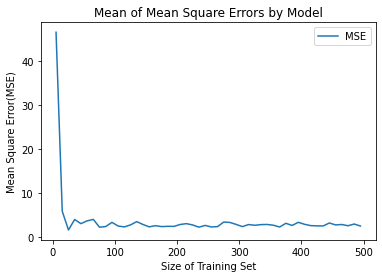

In [ ]:
ax=df_l.plot.line(x="SampleSize", y="MSE", title="Mean of Mean Square Errors by Model")
plot.ylabel('Mean Square Error(MSE)')
plot.xlabel('Size of Training Set')
plot.show()

#  Outlier Effects Use t distribution for some features in a small sample 

In [ ]:
# extract a small sample
from scipy.stats import t
df3= df.copy().sample(n=30) 
df3 = df3.reset_index(drop=True)
df3['X7'] = t.rvs(df=3, size=30)
df3['X8'] = t.rvs(df=5, size=30)
cols= ["Y"]
X=df3.drop(columns=cols)
y=df3["Y"]

KFold(n_splits=2, random_state=None, shuffle=False)


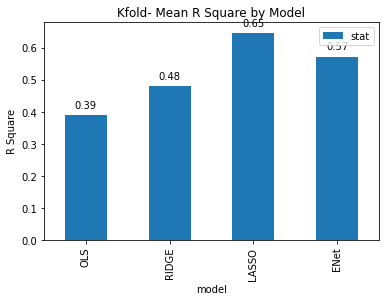

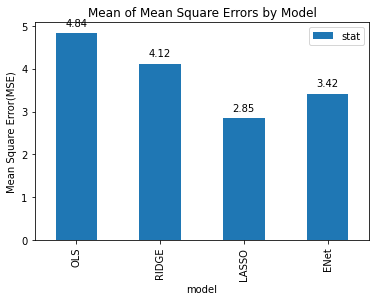

In [ ]:
df_rsquare, df_mse=scenarios(splits=2, alpha=0.5)

# Summary
## The following regularization tests were conducted on 6X500 (NxK) draws from the standard normal.(Also added quadratic and Cubic polynomials) 

*   Compared the out-of-sample performance of LASSO, Ridge, OLS, and Elastic Net, using k-fold cross validation
*   Defined a function to vary N & K samples for various models.Produced R^2 and MSE using k-fold cross validation.
*   Parameterized k-fold and alpha in a user defined function to observe the changes in MSE
*  Introduced highly corrleated feature to OLS regression to detect multicollienearity. 
*  Tested regularization on small sample regression
*  Used features extracted from t distribution to see the outlier effects 
## Regularization shows significant impact on small samples but as the sample size is large, the errors are comparable between various algorithms.  

@ Jeomoan Francis Kurian